In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

<Figure size 432x288 with 0 Axes>

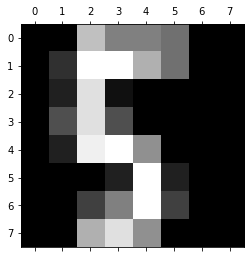

In [2]:
dig = load_digits()
plt.gray()
plt.matshow(dig.images[25])

In [3]:
onehot_target = pd.get_dummies(dig.target)

In [4]:
x_train, x_val, y_train, y_val = train_test_split(dig.data,onehot_target,test_size=0.1,random_state=20)

In [5]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adadelta(),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=64)
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1617/1617 [==============================] - 0s 234us/step - loss: 2.0650 - categorical_accuracy: 0.4632
Epoch 2/50
1617/1617 [==============================] - 0s 37us/step - loss: 1.3964 - categorical_accuracy: 0.8244
Epoch 3/50
1617/1617 [==============================] - 0s 34us/step - loss: 0.9187 - categorical_accuracy: 0.8831
Epoch 4/50
1617/1617 [==============================] - 0s 38us/step - loss: 0.6328 - categorical_accuracy: 0.9276
Epoch 5/50
1617/1617 [==============================] - 0s 45us/step - loss: 0.4659 - categorical_accuracy: 0.9425
Epoch 6/50
1617/1617 [==============================] - 0s 44us/step - loss: 0.3556 - categorical_accuracy: 0.9524
Epoch 7/50
1617/1617 [==============================] - 0s 38us/step - loss: 0.2855 - categorical_accuracy: 0.9641
Epoch 8/50
1617/1617 [==============================] - 0s 34us/step - los

In [16]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dig = load_digits()
onehot_target = pd.get_dummies(dig.target)
x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

class MyNN:
    def __init__(self, x, y):
        self.x = x
        neurons = 128
        self.lr = 0.5
        ip_dim = x.shape[1]
        op_dim = y.shape[1]

        self.w1 = np.random.randn(ip_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y

    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = sigmoid(z3)
        
    def backprop(self):
        loss = error(self.a3, self.y)
        print('Error :', loss)
        a3_delta = cross_entropy(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derv(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()

model = MyNN(x_train/16.0, np.array(y_train))

epochs = 1500
for x in range(epochs):
    model.feedforward()
    model.backprop()

def get_acc(x, y):
    acc = 0
    for xx,yy in zip(x, y):
        s = model.predict(xx)
        if s == np.argmax(yy):
            acc +=1
    return acc/len(x)*100

print("Training accuracy : ", get_acc(x_train/16, np.array(y_train)))
print("Test accuracy : ", get_acc(x_val/16, np.array(y_val)))


Error : 4.98048008368855
Error : 8.676169562753204
Error : 6.971323689345299
Error : 4.27412945111658
Error : 4.923719492352806
Error : 3.519053603529235
Error : 3.3415247484350576
Error : 3.1550628183656824
Error : 1.7457294186087544
Error : 1.943779894879433
Error : 1.4997035545309079
Error : 2.245268346664693
Error : 1.448610444160913
Error : 2.861699778118279
Error : 1.1656303628083027
Error : 1.2373179927675826
Error : 1.2045642885953654
Error : 1.0701712806291184
Error : 1.5795360841890083
Error : 1.086846204155657
Error : 1.4392962890599774
Error : 0.8965326489707827
Error : 1.6519242086642272
Error : 1.0034464413364648
Error : 1.208142655788862
Error : 0.8991522371997877
Error : 1.1901625253412813
Error : 0.9111307278519319
Error : 1.0994518911939664
Error : 0.9763488816000855
Error : 1.0099973507329862
Error : 0.979676897692496
Error : 0.9156121796328582
Error : 0.9905273745875355
Error : 0.8503423559219403
Error : 0.8978145776520777
Error : 0.775769629594228
Error : 0.8637092

Error : 0.12449293120270094
Error : 0.124100925888342
Error : 0.12371117919344632
Error : 0.12332367010112545
Error : 0.12293837787571318
Error : 0.12255528205815097
Error : 0.12217436246145928
Error : 0.12179559916629164
Error : 0.12141897251657119
Error : 0.12104446311520724
Error : 0.1206720518198898
Error : 0.12030171973896135
Error : 0.11993344822736343
Error : 0.11956721888265687
Error : 0.11920301354111397
Error : 0.11884081427388153
Error : 0.11848060338321216
Error : 0.11812236339876449
Error : 0.11776607707396818
Error : 0.11741172738245508
Error : 0.11705929751455325
Error : 0.11670877087384361
Error : 0.11636013107377752
Error : 0.11601336193435395
Error : 0.11566844747885609
Error : 0.11532537193064413
Error : 0.1149841197100059
Error : 0.11464467543106123
Error : 0.11430702389872163
Error : 0.1139711501057026
Error : 0.11363703922958779
Error : 0.11330467662994453
Error : 0.1129740478454895
Error : 0.11264513859130315
Error : 0.11231793475609271
Error : 0.1119924223995022

Error : 0.06136018511221307
Error : 0.06124548581015068
Error : 0.06113115141044872
Error : 0.06101718020944195
Error : 0.06090357051343076
Error : 0.06079032063862201
Error : 0.06067742891107068
Error : 0.06056489366662141
Error : 0.060452713250850984
Error : 0.06034088601901022
Error : 0.06022941033596694
Error : 0.06011828457614911
Error : 0.06000750712348773
Error : 0.059897076371360755
Error : 0.05978699072253691
Error : 0.0596772485891197
Error : 0.059567848392492045
Error : 0.05945878856326097
Error : 0.059350067541202305
Error : 0.059241683775206506
Error : 0.059133635723223624
Error : 0.05902592185220943
Error : 0.05891854063807145
Error : 0.05881149056561509
Error : 0.05870477012849038
Error : 0.05859837782913885
Error : 0.058492312178740374
Error : 0.058386571697160806
Error : 0.05828115491289937
Error : 0.058176060363036505
Error : 0.058071286593181996
Error : 0.05796683215742334
Error : 0.05786269561827418
Error : 0.05775887554662331
Error : 0.05765537052168355
Error : 0.0

Error : 0.038529371386769526
Error : 0.03847647415088018
Error : 0.03842369614071545
Error : 0.03837103698621076
Error : 0.03831849631885057
Error : 0.03826607377165904
Error : 0.0382137689791911
Error : 0.0381615815775234
Error : 0.03810951120424562
Error : 0.03805755749845135
Error : 0.03800572010072962
Error : 0.037953998653156046
Error : 0.0379023927992843
Error : 0.0378509021841376
Error : 0.03779952645420018
Error : 0.03774826525740887
Error : 0.03769711824314492
Error : 0.037646085062225575
Error : 0.03759516536689601
Error : 0.037544358810821125
Error : 0.03749366504907746
Error : 0.037443083738145345
Error : 0.03739261453590084
Error : 0.0373422571016079
Error : 0.037292011095910675
Error : 0.03724187618082559
Error : 0.037191852019733865
Error : 0.03714193827737383
Error : 0.03709213461983335
Error : 0.03704244071454243
Error : 0.03699285623026562
Error : 0.03694338083709493
Error : 0.036894014206442304
Error : 0.03684475601103244
Error : 0.03679560592489568
Error : 0.0367465

Error : 0.027035706652624607
Error : 0.02700632551388471
Error : 0.02697699828199822
Error : 0.02694772482600946
Error : 0.026918505015368265
Error : 0.026889338719928407
Error : 0.026860225809945796
Error : 0.026831166156076742
Error : 0.026802159629376328
Error : 0.026773206101296684
Error : 0.026744305443685255
Error : 0.026715457528783203
Error : 0.02668666222922367
Error : 0.026657919418030133
Error : 0.026629228968614783
Error : 0.026600590754776835
Error : 0.02657200465070087
Error : 0.02654347053095533
Error : 0.026514988270490723
Error : 0.026486557744638154
Error : 0.0264581788291076
Error : 0.02642985139998643
Error : 0.026401575333737704
Error : 0.026373350507198672
Error : 0.02634517679757919
Error : 0.026317054082460104
Error : 0.026288982239791744
Error : 0.02626096114789235
Error : 0.026232990685446538
Error : 0.026205070731503754
Error : 0.02617720116547676
Error : 0.02614938186714016
Error : 0.026121612716628766
Error : 0.026093893594436212
Error : 0.02606622438141344

Error : 0.020377719150076655
Error : 0.020359679090302854
Error : 0.02034166712794021
Error : 0.020323683203214198
Error : 0.02030572725650061
Error : 0.020287799228325364
Error : 0.02026989905936388
Error : 0.020252026690440777
Error : 0.020234182062529533
Error : 0.02021636511675195
Error : 0.020198575794377845
Error : 0.020180814036824618
Error : 0.020163079785656797
Error : 0.02014537298258579
Error : 0.020127693569469328
Error : 0.02011004148831115
Error : 0.020092416681260643
Error : 0.02007481909061233
Error : 0.020057248658805597
Error : 0.02003970532842425
Error : 0.02002218904219612
Error : 0.020004699742992713
Error : 0.019987237373828796
Error : 0.01996980187786202
Error : 0.019952393198392475
Error : 0.019935011278862467
Error : 0.019917656062855935
Error : 0.019900327494098233
Error : 0.019883025516455686
Error : 0.019865750073935182
Error : 0.01984850111068385
Error : 0.01983127857098864
Error : 0.019814082399276026
Error : 0.019796912540111487
Training accuracy :  100.0